# Lab | Data cleaning and wrangling

For this lab, we will be using the Marketing Customer Value Analysis database from before. Feel free to build on top of your previous notebooks, since there could be overlap with variable names.

Instructions:

This lab will focus on data cleaning and wrangling, this is a crucial step in the EDA process.

1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables.
4. Encode the categorical variables
5. Transform the time variables (day, week and month) to integers.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
7. Hint for Categorical Variables

Use either encoding or get_dummies to deal with the categorical variables (example below):

#### data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}) ####

given that column "coverage" in the dataframe "data" has three categories:
"basic", "extended", and "premium" and values are to be represented in the same order.

In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_customer_analysis_week_4.csv')

In [3]:
df.shape

(9134, 25)

In [4]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [5]:
df = df.drop(['month'],axis=1)

In [6]:
numericals = df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [7]:
numericals.isnull().sum()/len(df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

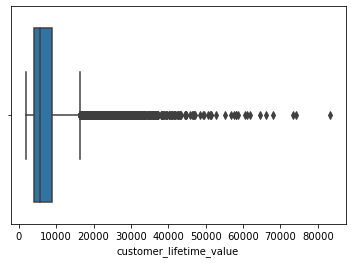

In [8]:
sns.boxplot(x ='customer_lifetime_value', data=df)
plt.show()

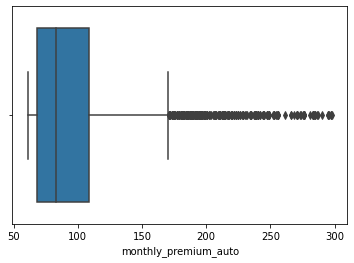

In [9]:
sns.boxplot(x ='monthly_premium_auto', data=df)
plt.show()

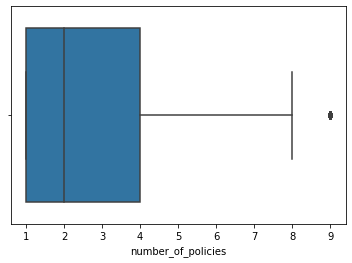

In [10]:
sns.boxplot(x ='number_of_policies', data=df)
plt.show()

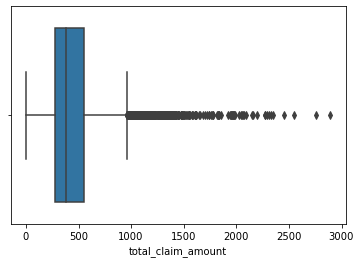

In [11]:
sns.boxplot(x ='total_claim_amount', data=df)
plt.show()

In [12]:
# Dealing with outliers 
iqr = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25)
upper_limit = np.percentile(df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(df['customer_lifetime_value'],25) - 1.5*iqr
# Normalization
df = df[(df['customer_lifetime_value']>lower_limit) & (df['customer_lifetime_value']<upper_limit)]

In [13]:
# Dealing with outliers
iqr = np.percentile(df['monthly_premium_auto'],75) - np.percentile(df['monthly_premium_auto'],25)
upper_limit = np.percentile(df['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(df['monthly_premium_auto'],25) - 1.5*iqr
# Normalization
df = df[(df['monthly_premium_auto']>lower_limit) & (df['monthly_premium_auto']<upper_limit)]

In [14]:
# Dealing with outliers
iqr = np.percentile(df['number_of_policies'],75) - np.percentile(df['number_of_policies'],25)
upper_limit = np.percentile(df['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(df['number_of_policies'],25) - 1.5*iqr
# Normalization
df = df[(df['number_of_policies']>lower_limit) & (df['number_of_policies']<upper_limit)]

In [15]:
# Dealing with outliers
iqr = np.percentile(df['total_claim_amount'],75) - np.percentile(df['total_claim_amount'],25)
upper_limit = np.percentile(df['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(df['total_claim_amount'],25) - 1.5*iqr
# Normalization
df = df[(df['total_claim_amount']>lower_limit) & (df['total_claim_amount']<upper_limit)]

In [16]:
df_new = df

#### Normalization

In [17]:
from sklearn.preprocessing import Normalizer

In [18]:
X = df_new.select_dtypes(include=np.number)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

#### Transforming time variables (day, week and month) to integers.

In [19]:
df_new['day'] = pd.DatetimeIndex(df_new['effective_to_date']).day
df_new['month'] = pd.DatetimeIndex(df_new['effective_to_date']).month
df_new['year'] = pd.DatetimeIndex(df_new['effective_to_date']).year
df_new.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011


In [20]:
# Droping effective_to_date column
df_new = df_new.drop(['effective_to_date'], axis=1)

In [21]:
# df_new['effective_to_date'] = df_new['day'].map(str) + df_new['month'].map(str) + df_new['year'].map(str)

In [22]:
df_new

,customer,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,6,1,2011
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2,2011
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,2,2011
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,2,2011


In [23]:
# df_new = df_new.drop(['day'], axis=1)
# df_new = df_new.drop(['month'], axis=1)
# df_new = df_new.drop(['year'], axis=1)
# df_new = df_new.drop(['customer'], axis=1) # customer id is not a value

In [24]:
# df_new['effective_to_date'] = df_new['effective_to_date'].astype('int')
df_new['day'] = df_new['day'].astype('int')
df_new['month'] = df_new['month'].astype('int')
df_new['month'] = df_new['month'].astype('int')

In [25]:
df_new

,customer,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,6,1,2011
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2,2011
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,2,2011
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,2,2011


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7399 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       7399 non-null   object 
 1   state                          7399 non-null   object 
 2   customer_lifetime_value        7399 non-null   float64
 3   response                       7399 non-null   object 
 4   coverage                       7399 non-null   object 
 5   education                      7399 non-null   object 
 6   employment_status              7399 non-null   object 
 7   gender                         7399 non-null   object 
 8   income                         7399 non-null   int64  
 9   location_code                  7399 non-null   object 
 10  marital_status                 7399 non-null   object 
 11  monthly_premium_auto           7399 non-null   int64  
 12  months_since_last_claim        7399 non-null   i

#### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [27]:
cat = df_new.select_dtypes(include = np.object)
cat

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:
col = cat.columns
col

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [29]:
categorical=pd.get_dummies(cat, columns =['state', 'response', 'coverage', 'education',
        'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],drop_first=False)
categorical.head()

,customer,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,BU79786,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,AI49188,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,WW63253,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,HB64268,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,OC83172,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


#### Hint for Categorical Variables